<a href="https://colab.research.google.com/github/Kwangbin/Keras_Basic/blob/main/MNIST_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#0.사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import  mnist
from keras.models import Sequential
from keras.layers import  Dense, Activation
import numpy as np

In [2]:
#학생 3명
np.random.seed(3)

In [3]:
#훈련셋과 시험셋 불러오기
(x_train,y_train),(x_test, y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#훈련셋과 데이터셋 분리
x_val= x_train[50000:]
y_val= y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [9]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
x_train.shape

(50000, 28, 28)

In [11]:
x_val.shape

(10000, 28, 28)

In [13]:
#데이터셋 전처리
x_train=x_train.reshape(50000, 784).astype('float32')/255.0
x_val=x_val.reshape(10000,784).astype('float32')/255.0
x_test=x_test.reshape(10000,784).astype('float32')/255.0

In [14]:
#훈련셋과 검증셋 고르기
train_rand_idxs= np.random.choice(50000,700)
val_rand_idxs=np.random.choice(10000,300)
x_train=x_train[train_rand_idxs]
y_train=y_train[train_rand_idxs]
x_val=x_val[val_rand_idxs]
y_val=y_val[val_rand_idxs]

In [15]:
#라벨 데이터 워핫 인코딩 처리
y_train=np_utils.to_categorical(y_train)
y_val=np_utils.to_categorical(y_val)
y_test=np_utils.to_categorical(y_test)

In [16]:
#2.모델 구성 하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [17]:
#3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [26]:
#4.모델 학습시키기
hist=model.fit(x_train,y_train,epochs=1000,batch_size=10,validation_data=(x_val,y_val))

Epoch 1/1000
70/70 [==============================] - 0s 3ms/step - loss: 2.2810 - accuracy: 0.1186 - val_loss: 2.2884 - val_accuracy: 0.1033
Epoch 2/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2811 - accuracy: 0.1186 - val_loss: 2.2888 - val_accuracy: 0.1033
Epoch 3/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2812 - accuracy: 0.1186 - val_loss: 2.2892 - val_accuracy: 0.1033
Epoch 4/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2810 - accuracy: 0.1186 - val_loss: 2.2893 - val_accuracy: 0.1033
Epoch 5/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2808 - accuracy: 0.1186 - val_loss: 2.2890 - val_accuracy: 0.1033
Epoch 6/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2806 - accuracy: 0.1186 - val_loss: 2.2895 - val_accuracy: 0.1033
Epoch 7/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2807 - accuracy: 0.1186 - val_loss: 2.2899 - val_accuracy: 0.1033
Epoch 

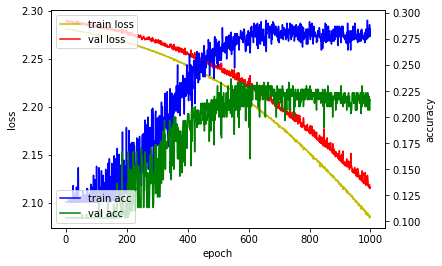

In [29]:
#학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax=plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
loss